# Ćwiczenia 7. Aproksymacja nieliniowa i optymalizacja

***Zadanie 1.***

Przygotouj dane pomiarowe znajdujące się w pliku `Raba2015.txt` lub w pliku `Raba2015.txt lepsza wersja` (format zapisu przystosowany do Pythona):
* Dostosuj format danych i umieść je w tablicy NumPy.
* Dane pochodzą z pomiarów przepływu wody ($m^3/s$) w rzece Rabie przeprowadzonych w miejscowości Stróża. Pomiary trwały 68 godzin (od godziny 10:00, 17 listopada 2015 r. do godziny 6:00, 20 listopada 2015 r.).
* Zaprezentuj dane na wykresie.
* Przeprowadź aproskymację przebiegu fali powodziowej za pomocą wielomianu. Wykorzystaj metodę `scipy.optimize.curve_fit`.

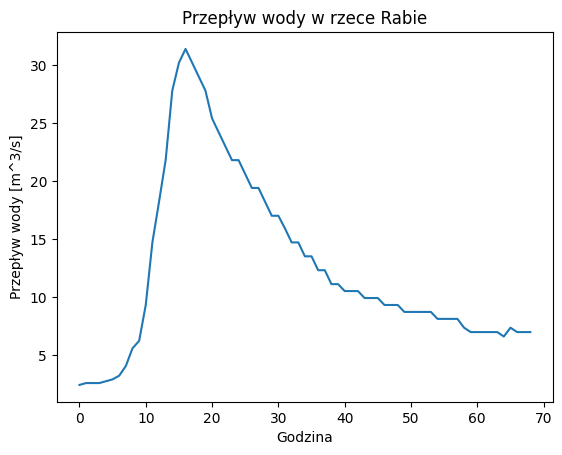

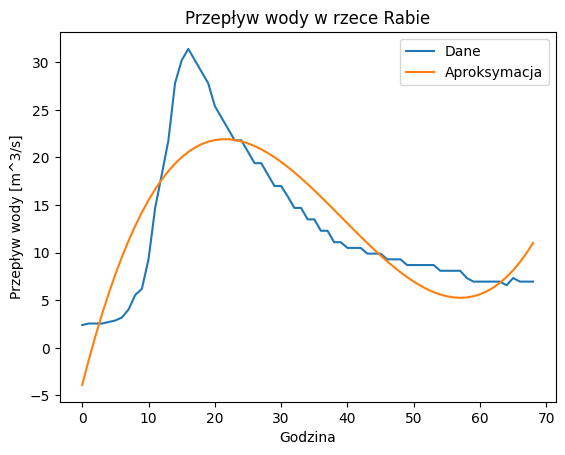

In [ ]:
# ***Zadanie 1.***

# Przygotouj dane pomiarowe znajdujące się w pliku `Raba2015.txt` lub w pliku `Raba2015.txt lepsza wersja` (format zapisu przystosowany do Pythona):
# * Dostosuj format danych i umieść je w tablicy NumPy.
# * Dane pochodzą z pomiarów przepływu wody ($m^3/s$) w rzece Rabie przeprowadzonych w miejscowości Stróża. Pomiary trwały 68 godzin (od godziny 10:00, 17 listopada 2015 r. do godziny 6:00, 20 listopada 2015 r.).
# * Zaprezentuj dane na wykresie.
# * Przeprowadź aproskymację przebiegu fali powodziowej za pomocą wielomianu. Wykorzystaj metodę `scipy.optimize.curve_fit`.


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Wczytanie danych z pliku
with open('raba_lepsza.txt', 'r') as file:
    data = file.read()
data = data.replace('\n', ' ').replace(',', ' ').split()
q = np.array([float(x) for x in data])

# Tworzenie tablicy z godzinami
hours = np.arange(0, len(q))

# Wykres
plt.plot(hours, q)
plt.xlabel('Godzina')
plt.ylabel('Przepływ wody [m^3/s]')
plt.title('Przepływ wody w rzece Rabie')
plt.show()

# Aproksymacja wielomianem
def poly(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

popt, pcov = curve_fit(poly, hours, q)
q_fit = poly(hours, *popt)

plt.plot(hours, q, label='Dane')
plt.plot(hours, q_fit, label='Aproksymacja')
plt.xlabel('Godzina')
plt.ylabel('Przepływ wody [m^3/s]')
plt.title('Przepływ wody w rzece Rabie')
plt.legend()
plt.show()



***Zadanie 2. Nieliniowa aproksymacja tempa opadu fali powodziowej***

1. Przyjmijmy następujący wskaźnik jakość aproksymacji: $\sum_{i=0}^{n}(F(x_i)-y_i)^2$. Chcemy przeprowadzić aproksymacje fragmentu zbioru danych, który reprezentuje spadek przepływu. 
2. Obliczyć wartości parametrów funkcji aproksymującej postaci $f(x) = ce^{−\lambda x}$ za pomocą funkcji `scipy.optimize.minimize`, przetestuj różne solvery.
3. Wykreśl dane oraz funkcję aproksymującą.
4. Oceń jakość aproksymacji.
5. Powyższy eksperyment należy powtórzyć z funkcją aproksymującą o większej liczbie parametrów.
6. Zaproponuj inną funkcji aproksymującej z liniowymi lub nieliniowymi parametrami i przeprowadź aproksymację fali powodziowej.

In [ ]:
# 1. Przyjmijmy następujący wskaźnik jakość aproksymacji: $\sum_{i=0}^{n}(F(x_i)-y_i)^2$. Chcemy przeprowadzić aproksymacje fragmentu zbioru danych, który reprezentuje spadek przepływu. 
# 2. Obliczyć wartości parametrów funkcji aproksymującej postaci $f(x) = ce^{−\lambda x}$ za pomocą funkcji `scipy.optimize.minimize`, przetestuj różne solvery.
# 3. Wykreśl dane oraz funkcję aproksymującą.
# 4. Oceń jakość aproksymacji.
# 5. Powyższy eksperyment należy powtórzyć z funkcją aproksymującą o większej liczbie parametrów.
# 6. Zaproponuj inną funkcji aproksymującej z liniowymi lub nieliniowymi parametrami i przeprowadź aproksymację fali powodziowej.

from scipy.optimize import minimize

# Wczytanie danych z pliku
# jest to ten sam plik co w poprzednim zadaniu

# Wyznaczenie fragmentu zbioru danych, który reprezentuje spadek przepływu
q_decreasing = q[20:60]
hours_decreasing = hours[20:60]

# Funkcja aproksymująca
def exp_func(x, c, l):
    return c*np.exp(-l*x)

# # Wykreślenie danych
# plt.plot(hours_decreasing, q_decreasing, label='Dane')
# plt.xlabel('Godzina')
# plt.ylabel('Przepływ wody [m^3/s]')
# plt.title('Spadek przepływu wody w rzece Rabie')
# plt.show()

# Wskaźnik jakości aproksymacji
def quality(x):
    c = x[0]
    l = x[1]
    sum = 0
    for i in range(len(q_decreasing)):
        sum += (exp_func(, c, l) - q_decreasing[i])**2

# Wykres funkcji aproksymującej
popt_dec, pco_dec = minimize(quality, x0=[1,1], method='Powell', tol=1e-6)
q_fit_dec = exp_func(hours_decreasing, popt_dec, pco_dec)

plt.plot(hours_decreasing, q_decreasing, label='Dane')
plt.plot(hours_decreasing, q_fit_dec, label='Aproksymacja')
plt.xlabel('Godzina')
plt.ylabel('Przepływ wody [m^3/s]')
plt.title('Spadek przepływu wody w rzece Rabie')
plt.legend()
plt.show()





ValueError: too many values to unpack (expected 2)

***Zadanie 3. Aproksymacja przebiegu w całej dziedzinie pomiaru***


Aproksymacja przepływu w całym zakresie pomiarów:
* Próba z wielomianami wykładniczymi. Czy zwiększanie liczby składników prowadzi do poprawy aproksymacji?
* Algorytm dla aproksymacji funkcjami sklejanymi.